In [52]:
# Setting and reading file
import numpy as np
import matplotlib.pyplot as plt

temp, ene, err_e, c, err_c, magn, err_m, chi, err_chi = np.loadtxt("/home/piet/Esercizi/lezione6/6.1/values_metro.0",\
            usecols=(0,1,2,3,4,5,6,7,8), delimiter=' ', unpack='true')
Htemp, Hene, Herr_e, Hc, Herr_c, Hmagn, Herr_m, Hchi, Herr_chi = np.loadtxt("/home/piet/Esercizi/lezione6/6.1/values_metro_h.0",\
            usecols=(0,1,2,3,4,5,6,7,8), delimiter=' ', unpack='true')
Gtemp, Gene, Gerr_e, Gc, Gerr_c, Gmagn, Gerr_m, Gchi, Gerr_chi = np.loadtxt("/home/piet/Esercizi/lezione6/6.1/values_gibbs.0",\
            usecols=(0,1,2,3,4,5,6,7,8), delimiter=' ', unpack='true')
GHtemp, GHene, GHerr_e, GHc, GHerr_c, GHmagn, GHerr_m, GHchi, GHerr_chi = np.loadtxt("/home/piet/Esercizi/lezione6/6.1/values_gibbs_h.0",\
            usecols=(0,1,2,3,4,5,6,7,8), delimiter=' ', unpack='true')

In [37]:
# ENERGY
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

In [38]:
# HEAT CAPACITY
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

In [39]:
# MAGNETIZATION 
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

In [40]:
# MAGNETIC SUSCEPTIBILITY (WITH h=0)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

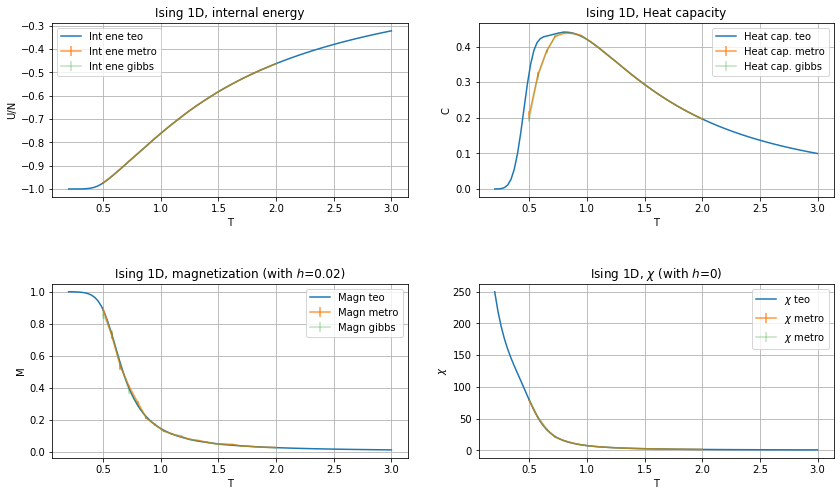

In [53]:
# plotting
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,8),gridspec_kw=dict(wspace=0.2, hspace=0.5))
# subplot
# energy
ax[0,0].plot(T, e, label='Int ene teo')
ax[0,0].errorbar(temp,ene,yerr=err_e,alpha=0.8,label='Int ene metro')
ax[0,0].errorbar(Gtemp,Gene,yerr=Gerr_e,alpha=0.3,label='Int ene gibbs')
ax[0,0].set_title('Ising 1D, internal energy')
ax[0,0].set_xlabel('T')
ax[0,0].set_ylabel('U/N')
ax[0,0].legend()
ax[0,0].grid(True)
# heat capacity
ax[0,1].plot(T, heat, label='Heat cap. teo')
ax[0,1].errorbar(temp,c,yerr=err_c,alpha=0.8,label='Heat cap. metro')
ax[0,1].errorbar(Gtemp,Gc,yerr=Gerr_c,alpha=0.3,label='Heat cap. gibbs')
ax[0,1].set_title('Ising 1D, Heat capacity')
ax[0,1].set_xlabel('T')
ax[0,1].set_ylabel('C')
ax[0,1].legend()
ax[0,1].grid(True)
# magnetization (with ℎ≠0)
ax[1,0].plot(T, M, label='Magn teo')
ax[1,0].errorbar(Htemp,Hmagn,yerr=Herr_m,alpha=0.8,label='Magn metro')
ax[1,0].errorbar(GHtemp,GHmagn,yerr=GHerr_m,alpha=0.3,label='Magn gibbs')
ax[1,0].set_title('Ising 1D, magnetization (with ℎ=0.02)')
ax[1,0].set_xlabel('T')
ax[1,0].set_ylabel('M')
ax[1,0].legend()
ax[1,0].grid(True)
# $\chi$
ax[1,1].plot(T, X, label=f'$\chi$ teo')
ax[1,1].errorbar(temp,chi,yerr=err_chi,alpha=0.8,label=f'$\chi$ metro')
ax[1,1].errorbar(Gtemp,Gchi,yerr=Gerr_chi,alpha=0.3,label=f'$\chi$ metro')
ax[1,1].set_title(f'Ising 1D, $\chi$ (with ℎ=0)')
ax[1,1].set_xlabel('T')
ax[1,1].set_ylabel(f'$\chi$')
ax[1,1].legend()
ax[1,1].grid(True)
plt.show()